In [1]:
import clickhouse_connect
import matplotlib.pyplot as plt
import pandas as pd
import polars as pl

pl.Config.set_fmt_str_lengths(200)
pl.Config.set_fmt_float("full")

polars.config.Config

### Direct connect to Cryptohouse
Connect to cryptohouse with client to do some initial querying and result aggregation. Currently cryptohouse direct queries are limited to about 10MB worth of data, which is around 1000 blocks.

In [2]:
# Create a connection to the ClickHouse server
client = clickhouse_connect.get_client(
    host='crypto-clickhouse.clickhouse.com',
    username='crypto',
    password='',
    secure=True
)

In [3]:
# Execute the query and return as a pandas dataframe
query: str = """
SELECT
  *
FROM
  solana.transactions ARRAY
  JOIN accounts AS account
WHERE
  arrayExists(
    x -> x.1 IN [ 
        'Fc8bpeCMifWYv97pQ3k5xDvd98nuVg6yAaZrwmy4RRp6', -- zeta dex address
        'pythWSnswVUd12oZpeFP8e9CVaEqJg25g1Vtc2biRsT' -- pyth price feed
    ],
    accounts
  )
  
  AND block_slot > 282899000
  AND block_slot < 282900000
  // AND block_timestamp >= now() - INTERVAL 5 MINUTE
  AND account.2 = true -- Filter for signer accounts only
"""

In [4]:
results: pd.DataFrame = client.query_df(query)

df = pl.from_pandas(results)

In [5]:
df.shape

(3434, 15)

In [6]:
df.head(3)

accounts,balance_changes,block_hash,block_slot,block_timestamp,compute_units_consumed,err,fee,index,log_messages,post_token_balances,pre_token_balances,recent_block_hash,signature,status
list[struct[3]],list[struct[3]],str,i64,datetime[μs],"decimal[9,9]",str,"decimal[15,9]",i64,list[str],list[null],list[null],str,str,str
"[{""Fc8bpeCMifWYv97pQ3k5xDvd98nuVg6yAaZrwmy4RRp6"",true,true}, {""Hq7WbN3BKvdcycM5PKKoofHFnhPJnyUEo4z4iUYWZSNw"",false,true}, … {""ComputeBudget111111111111111111111111111111"",false,false}]","[{""Fc8bpeCMifWYv97pQ3k5xDvd98nuVg6yAaZrwmy4RRp6"",42255609352.000000000,42255704352.000000000}, {""Hq7WbN3BKvdcycM5PKKoofHFnhPJnyUEo4z4iUYWZSNw"",0.000000000,0.000000000}, … {""ComputeBudget111111111111111111111111111111"",1.000000000,1.000000000}]","""3oEv34q5yahtdkwUXGPPhJHjXkz4gPX2n5cPzLyKCzwF""",282899178,2024-08-11 08:13:57,0.000000000,"""{""InstructionError"": [0, {""Custom"": 3003}]}""",95000.000000000,72,"[""Program HDwcJBJXjL9FpJ7UBsYBtaDjsBUhuLCUYoz3zr8SWWaQ invoke [1]"", ""Program log: Instruction: WriteEncodedVaa"", … ""Program HDwcJBJXjL9FpJ7UBsYBtaDjsBUhuLCUYoz3zr8SWWaQ failed: custom program error: 0xbbb""]",[],[],"""FycSFyt6T1Zwxg9LmFGfyvhmY5tg5qGkKsppnjgagPQt""","""34gnweJyLJ3MCGwCYapks1WmrkjQ7sLb8phqMAyrDwVeZoAXdXt1wf46JHC7rEiLjAg6Nv2iRkEHTbnmQWX57s6f""","""0"""
"[{""Fc8bpeCMifWYv97pQ3k5xDvd98nuVg6yAaZrwmy4RRp6"",true,true}, {""2b4P98hutH28dLY4YHB9NoqRKumop4BZGWb9kdr8hKG9"",false,true}, … {""ComputeBudget111111111111111111111111111111"",false,false}]","[{""Fc8bpeCMifWYv97pQ3k5xDvd98nuVg6yAaZrwmy4RRp6"",42255704352.000000000,42255769352.000000000}, {""2b4P98hutH28dLY4YHB9NoqRKumop4BZGWb9kdr8hKG9"",945620.000000000,945620.000000000}, … {""ComputeBudget111111111111111111111111111111"",1.000000000,1.000000000}]","""3oEv34q5yahtdkwUXGPPhJHjXkz4gPX2n5cPzLyKCzwF""",282899178,2024-08-11 08:13:57,0.000000000,"""{""InstructionError"": [0, {""Custom"": 6007}]}""",65000.000000000,71,"[""Program pythWSnswVUd12oZpeFP8e9CVaEqJg25g1Vtc2biRsT invoke [1]"", ""Program log: Instruction: UpdatePriceFeed"", … ""Program pythWSnswVUd12oZpeFP8e9CVaEqJg25g1Vtc2biRsT failed: custom program error: 0x1777""]",[],[],"""FycSFyt6T1Zwxg9LmFGfyvhmY5tg5qGkKsppnjgagPQt""","""3CS5NsToSrb8xTnAr9jR72LaMS22JS3MhTWccwsZzU76WjW9T6BcB5ZUEuT6VrL1Gj9zHVc7b7cqgRuQvvRyb3Pz""","""0"""
"[{""Fc8bpeCMifWYv97pQ3k5xDvd98nuVg6yAaZrwmy4RRp6"",true,true}, {""Hq7WbN3BKvdcycM5PKKoofHFnhPJnyUEo4z4iUYWZSNw"",false,true}, … {""ComputeBudget111111111111111111111111111111"",false,false}]","[{""Fc8bpeCMifWYv97pQ3k5xDvd98nuVg6yAaZrwmy4RRp6"",42255769352.000000000,42247967392.000000000}, {""Hq7WbN3BKvdcycM5PKKoofHFnhPJnyUEo4z4iUYWZSNw"",0.000000000,7836960.000000000}, … {""ComputeBudget111111111111111111111111111111"",1.000000000,1.000000000}]","""3oEv34q5yahtdkwUXGPPhJHjXkz4gPX2n5cPzLyKCzwF""",282899178,2024-08-11 08:13:57,0.000000000,"""null""",35000.000000000,69,"[""Program HDwcJBJXjL9FpJ7UBsYBtaDjsBUhuLCUYoz3zr8SWWaQ invoke [1]"", ""Program log: Instruction: CloseEncodedVaa"", … ""Program ComputeBudget111111111111111111111111111111 success""]",[],[],"""FycSFyt6T1Zwxg9LmFGfyvhmY5tg5qGkKsppnjgagPQt""","""5aMoYGz511Yxajqdj4NA9o7Hg8GAcCfBZnTYoYTbBPHcQi1KgKnqbW8CFAFcrkSYAz3Anhan1sfLMw2LGqB8LJsi""","""1"""


In [7]:
# groupby log_messages for successful and failed transactions.
df.group_by('status', 'log_messages').agg(
    pl.len().alias('count')).sort(by='count', descending=True).head(5)

status,log_messages,count
str,list[str],u32
"""0""","[""Program ComputeBudget111111111111111111111111111111 invoke [1]"", ""Program ComputeBudget111111111111111111111111111111 success"", … ""Program ZETAxsqBRek56DhiGXrn75yj2NHU3aYUnxvHXpkf3aD failed: custom program error: 0x1819""]",702
"""1""","[""Program 11111111111111111111111111111111 invoke [1]"", ""Program 11111111111111111111111111111111 success"", … ""Program ComputeBudget111111111111111111111111111111 success""]",410
"""0""","[""Program pythWSnswVUd12oZpeFP8e9CVaEqJg25g1Vtc2biRsT invoke [1]"", ""Program log: Instruction: UpdatePriceFeed"", … ""Program pythWSnswVUd12oZpeFP8e9CVaEqJg25g1Vtc2biRsT failed: custom program error: 0x1777""]",134
"""0""","[""Program HDwcJBJXjL9FpJ7UBsYBtaDjsBUhuLCUYoz3zr8SWWaQ invoke [1]"", ""Program log: Instruction: WriteEncodedVaa"", … ""Program HDwcJBJXjL9FpJ7UBsYBtaDjsBUhuLCUYoz3zr8SWWaQ failed: custom program error: 0xbbb""]",82
"""1""","[""Program HDwcJBJXjL9FpJ7UBsYBtaDjsBUhuLCUYoz3zr8SWWaQ invoke [1]"", ""Program log: Instruction: CloseEncodedVaa"", … ""Program ComputeBudget111111111111111111111111111111 success""]",82


In [8]:
# blocks with highest error rates
df.group_by('block_slot', 'status').agg(pl.len().alias('count')).sort(
    by='count', descending=True).filter(pl.col('status') == "0").head(5)

block_slot,status,count
i64,str,u32
282899126,"""0""",127
282899186,"""0""",93
282899763,"""0""",71
282899519,"""0""",62
282899762,"""0""",44


In [9]:
# blocks with highest successful transactions
df.group_by('block_slot', 'status').agg(pl.len().alias('count')).sort(
    by='count', descending=True).filter(pl.col('status') == "1").head(5)

block_slot,status,count
i64,str,u32
282899246,"""1""",36
282899082,"""1""",27
282899583,"""1""",27
282899186,"""1""",24
282899123,"""1""",24


### What do failed messages look like?

In [10]:
# majority of txs failed in this block.
high_fail_block = df.filter(pl.col('block_slot') == 282899126).group_by(
    'block_slot', 'status').agg(pl.len().alias('count')).sort(by='count', descending=True)
high_fail_block

block_slot,status,count
i64,str,u32
282899126,"""0""",127
282899126,"""1""",15


In [11]:
fail_df = df.filter(pl.col('block_slot') == 282899126)

# these are the failed transaction log messages.
for i in range(len(fail_df.filter(pl.col('status') == "0").group_by('log_messages').agg(pl.len().alias('count')).sort(by='count', descending=True).to_dicts())):
    print(fail_df.filter(pl.col('status') == "0").group_by('log_messages').agg(
        pl.len().alias('count')).sort(by='count', descending=True).to_dicts()[i])

{'log_messages': ['Program ZETAxsqBRek56DhiGXrn75yj2NHU3aYUnxvHXpkf3aD invoke [1]', 'Program log: Instruction: UpdatePricingV3', 'Program log: AnchorError thrown in programs/zeta/src/lib.rs:1206. Error Code: InvalidOracleUpdate. Error Number: 6169. Error Message: Invalid oracle update.', 'Program ZETAxsqBRek56DhiGXrn75yj2NHU3aYUnxvHXpkf3aD consumed 8687 of 200000 compute units', 'Program ZETAxsqBRek56DhiGXrn75yj2NHU3aYUnxvHXpkf3aD failed: custom program error: 0x1819'], 'count': 70}
{'log_messages': ['Program ComputeBudget111111111111111111111111111111 invoke [1]', 'Program ComputeBudget111111111111111111111111111111 success', 'Program ZETAxsqBRek56DhiGXrn75yj2NHU3aYUnxvHXpkf3aD invoke [1]', 'Program log: Instruction: UpdatePricingV3', 'Program log: AnchorError thrown in programs/zeta/src/lib.rs:1206. Error Code: InvalidOracleUpdate. Error Number: 6169. Error Message: Invalid oracle update.', 'Program ZETAxsqBRek56DhiGXrn75yj2NHU3aYUnxvHXpkf3aD consumed 8687 of 199850 compute units', '

### jito blocks

In [12]:
# List of jito tip accounts
jito_tip_accts = [
    '96gYZGLnJYVFmbjzopPSU6QiEV5fGqZNyN9nmNhvrZU5',
    'HFqU5x63VTqvQss8hp11i4wVV8bD44PvwucfZ2bU7gRe',
    'Cw8CFyM9FkoMi7K7Crf6HNQqf4uEMzpKw6QNghXLvLkY',
    'ADaUMid9yfUytqMBgopwjb2DTLSokTSzL1zt6iGPaS49',
    'DfXygSm4jCyNCybVYYK6DwvWqjKee8pbDmJGcLWNDXjh',
    'ADuUkR4vqLUMWXxW9gh6D6L8pMSawimctcNZ5pGwDcEt',
    'DttWaMuVvTiduZRnguLF7jNxTgiMBZ1hyAumKUiL2KRL',
    '3AVi9Tg9Uo68tJfuvoKvqKNWKkC5wPdSSdeBnizKZ6jT'
]

# Filter for the transactions that have a jito account inside of the accounts field.
# This indicates that the transaction sent a tip to the jito account in the same transaction
jito_block_label = (
    df.explode('accounts')
    .with_columns(
        pl.col("accounts").struct.field("pubkey").alias("jit_acct")
    )
).filter(pl.col('jit_acct').is_in(jito_tip_accts)).select('block_slot').unique()['block_slot'].to_list()

In [13]:
jito_df_labeled = df.with_columns(
    # add boolean column to indicate if the block is a jito block
    pl.col('block_slot').is_in(jito_block_label).alias('jito_block')
)

In [14]:
df.head(5)

accounts,balance_changes,block_hash,block_slot,block_timestamp,compute_units_consumed,err,fee,index,log_messages,post_token_balances,pre_token_balances,recent_block_hash,signature,status
list[struct[3]],list[struct[3]],str,i64,datetime[μs],"decimal[9,9]",str,"decimal[15,9]",i64,list[str],list[null],list[null],str,str,str
"[{""Fc8bpeCMifWYv97pQ3k5xDvd98nuVg6yAaZrwmy4RRp6"",true,true}, {""Hq7WbN3BKvdcycM5PKKoofHFnhPJnyUEo4z4iUYWZSNw"",false,true}, … {""ComputeBudget111111111111111111111111111111"",false,false}]","[{""Fc8bpeCMifWYv97pQ3k5xDvd98nuVg6yAaZrwmy4RRp6"",42255609352.000000000,42255704352.000000000}, {""Hq7WbN3BKvdcycM5PKKoofHFnhPJnyUEo4z4iUYWZSNw"",0.000000000,0.000000000}, … {""ComputeBudget111111111111111111111111111111"",1.000000000,1.000000000}]","""3oEv34q5yahtdkwUXGPPhJHjXkz4gPX2n5cPzLyKCzwF""",282899178,2024-08-11 08:13:57,0.000000000,"""{""InstructionError"": [0, {""Custom"": 3003}]}""",95000.000000000,72,"[""Program HDwcJBJXjL9FpJ7UBsYBtaDjsBUhuLCUYoz3zr8SWWaQ invoke [1]"", ""Program log: Instruction: WriteEncodedVaa"", … ""Program HDwcJBJXjL9FpJ7UBsYBtaDjsBUhuLCUYoz3zr8SWWaQ failed: custom program error: 0xbbb""]",[],[],"""FycSFyt6T1Zwxg9LmFGfyvhmY5tg5qGkKsppnjgagPQt""","""34gnweJyLJ3MCGwCYapks1WmrkjQ7sLb8phqMAyrDwVeZoAXdXt1wf46JHC7rEiLjAg6Nv2iRkEHTbnmQWX57s6f""","""0"""
"[{""Fc8bpeCMifWYv97pQ3k5xDvd98nuVg6yAaZrwmy4RRp6"",true,true}, {""2b4P98hutH28dLY4YHB9NoqRKumop4BZGWb9kdr8hKG9"",false,true}, … {""ComputeBudget111111111111111111111111111111"",false,false}]","[{""Fc8bpeCMifWYv97pQ3k5xDvd98nuVg6yAaZrwmy4RRp6"",42255704352.000000000,42255769352.000000000}, {""2b4P98hutH28dLY4YHB9NoqRKumop4BZGWb9kdr8hKG9"",945620.000000000,945620.000000000}, … {""ComputeBudget111111111111111111111111111111"",1.000000000,1.000000000}]","""3oEv34q5yahtdkwUXGPPhJHjXkz4gPX2n5cPzLyKCzwF""",282899178,2024-08-11 08:13:57,0.000000000,"""{""InstructionError"": [0, {""Custom"": 6007}]}""",65000.000000000,71,"[""Program pythWSnswVUd12oZpeFP8e9CVaEqJg25g1Vtc2biRsT invoke [1]"", ""Program log: Instruction: UpdatePriceFeed"", … ""Program pythWSnswVUd12oZpeFP8e9CVaEqJg25g1Vtc2biRsT failed: custom program error: 0x1777""]",[],[],"""FycSFyt6T1Zwxg9LmFGfyvhmY5tg5qGkKsppnjgagPQt""","""3CS5NsToSrb8xTnAr9jR72LaMS22JS3MhTWccwsZzU76WjW9T6BcB5ZUEuT6VrL1Gj9zHVc7b7cqgRuQvvRyb3Pz""","""0"""
"[{""Fc8bpeCMifWYv97pQ3k5xDvd98nuVg6yAaZrwmy4RRp6"",true,true}, {""Hq7WbN3BKvdcycM5PKKoofHFnhPJnyUEo4z4iUYWZSNw"",false,true}, … {""ComputeBudget111111111111111111111111111111"",false,false}]","[{""Fc8bpeCMifWYv97pQ3k5xDvd98nuVg6yAaZrwmy4RRp6"",42255769352.000000000,42247967392.000000000}, {""Hq7WbN3BKvdcycM5PKKoofHFnhPJnyUEo4z4iUYWZSNw"",0.000000000,7836960.000000000}, … {""ComputeBudget111111111111111111111111111111"",1.000000000,1.000000000}]","""3oEv34q5yahtdkwUXGPPhJHjXkz4gPX2n5cPzLyKCzwF""",282899178,2024-08-11 08:13:57,0.000000000,"""null""",35000.000000000,69,"[""Program HDwcJBJXjL9FpJ7UBsYBtaDjsBUhuLCUYoz3zr8SWWaQ invoke [1]"", ""Program log: Instruction: CloseEncodedVaa"", … ""Program ComputeBudget111111111111111111111111111111 success""]",[],[],"""FycSFyt6T1Zwxg9LmFGfyvhmY5tg5qGkKsppnjgagPQt""","""5aMoYGz511Yxajqdj4NA9o7Hg8GAcCfBZnTYoYTbBPHcQi1KgKnqbW8CFAFcrkSYAz3Anhan1sfLMw2LGqB8LJsi""","""1"""
"[{""Fc8bpeCMifWYv97pQ3k5xDvd98nuVg6yAaZrwmy4RRp6"",true,true}, {""Hq7WbN3BKvdcycM5PKKoofHFnhPJnyUEo4z4iUYWZSNw"",true,true}, … {""ComputeBudget111111111111111111111111111111"",false,false}]","[{""Fc8bpeCMifWYv97pQ3k5xDvd98nuVg6yAaZrwmy4RRp6"",42247967392.000000000,42255904352.000000000}, {""Hq7WbN3BKvdcycM5PKKoofHFnhPJnyUEo4z4iUYWZSNw"",7836960.000000000,0.000000000}, … {""ComputeBudget111111111111111111111111111111"",1.000000000,1.000000000}]","""3oEv34q5yahtdkwUXGPPhJHjXkz4gPX2n5cPzLyKCzwF""",282899178,2024-08-11 08:13:57,0.000000000,"""null""",100000.000000000,59,"[""Program 11111111111111111111111111111111 invoke [1]"", ""Program 11111111111111111111111111111111 success"", … ""Program ComputeBudget111111111111111111111111111111 success""]",[],[],"""FycSFyt6T1Zw

In [15]:
(
    df.with_columns(
        # add boolean column to indicate if the block is a jito block
        pl.col('block_slot').is_in(jito_block_label).alias('jito_block')
    )
    .group_by('block_slot', 'status').agg(
        pl.len().alias('tx_count'),
        pl.col('jito_block').first().alias('jito_block'),
        pl.col('block_timestamp').first().alias('block_timestamp')
    )
    .sort(by='tx_count', descending=True)
).plot.line(x='block_timestamp', y='tx_count', by='status', title='Tx Failure Rate Spikes')

:NdOverlay   [status]
   :Curve   [block_timestamp]   (tx_count)

In [33]:
(
    df
    .with_columns(
        pl.col('block_slot').is_in(jito_block_label).alias('jito_block'),
        pl.col('block_timestamp').dt.round(
            '5m').alias('block_timestamp_rounded')
    )
    .group_by(['block_slot', 'status'])
    .agg(
        pl.len().alias('tx_count'),
        pl.col('block_timestamp_rounded').first().alias(
            'block_timestamp_rounded')
    )
)

block_slot,status,tx_count,block_timestamp_rounded
i64,str,u32,datetime[μs]
282899380,"""1""",4,2024-08-11 08:15:00
282899816,"""0""",8,2024-08-11 08:20:00
282899718,"""0""",2,2024-08-11 08:20:00
282899047,"""1""",5,2024-08-11 08:15:00
282899652,"""1""",7,2024-08-11 08:15:00
…,…,…,…
282899792,"""1""",3,2024-08-11 08:20:00
282899095,"""1""",3,2024-08-11 08:15:00
282899200,"""0""",5,2024-08-11 08:15:00


In [36]:



# jito_block_df = (
#     df
#     .with_columns(
#         pl.col('block_slot').is_in(jito_block_label).alias('jito_block'),
#         pl.col('block_timestamp').dt.round(
#             '5m').alias('block_timestamp_rounded')
#     )
#     .group_by(['block_slot', 'status'])
#     .agg(
#         pl.len().alias('tx_count'),
#         pl.col('block_timestamp_rounded').first().alias(
#             'block_timestamp_rounded'),
#         pl.col('jito_block').first().alias('jito_block')
#     )
#     .filter(pl.col('jito_block') == True)
#     .sort(by='tx_count', descending=True)
# ).to_pandas()

# non_jito_block_df = (
#     df
#     .with_columns(
#         pl.col('block_slot').is_in(jito_block_label).alias('jito_block'),
#         pl.col('block_timestamp').dt.round(
#             '5m').alias('block_timestamp_rounded'),
#     )
#     .group_by(['block_slot', 'status'])
#     .agg(
#         pl.len().alias('tx_count'),
#         pl.col('block_timestamp_rounded').first().alias(
#             'block_timestamp_rounded'),
#         pl.col('jito_block').first().alias('jito_block')
#     )
#     .filter(pl.col('jito_block') == False)
#     .sort(by='tx_count', descending=True)
# ).to_pandas()

In [52]:
jito_block_df = (
    df
    .with_columns(
        pl.col('block_slot').is_in(jito_block_label).alias('jito_block'),
        pl.col('block_timestamp').dt.round(
            '1s').alias('block_timestamp_rounded')
    )
    .group_by(['block_timestamp_rounded', 'status'])
    .agg(
        pl.len().alias('tx_count'),
        pl.col('jito_block').first().alias('jito_block')
    )
    .filter(pl.col('jito_block') == True)
    .sort(by='tx_count', descending=True)
).to_pandas()

non_jito_block_df = (
    df
    .with_columns(
        pl.col('block_slot').is_in(jito_block_label).alias('jito_block'),
        pl.col('block_timestamp').dt.round(
            '30s').alias('block_timestamp_rounded'),
    )
    .group_by(['block_timestamp_rounded', 'status'])
    .agg(
        pl.len().alias('tx_count'),
        pl.col('jito_block').first().alias('jito_block')
    )
    .filter(pl.col('jito_block') == False)
    .sort(by='tx_count', descending=True)
).to_pandas()

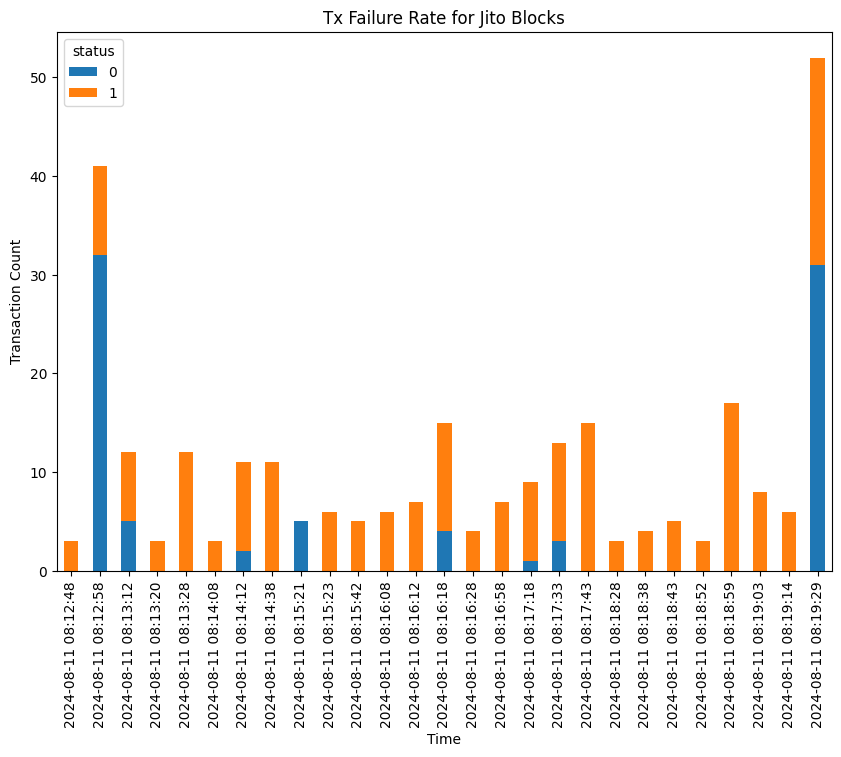

In [57]:
# Assuming jito_block_df is your Pandas DataFrame
# Group by 'block_timestamp_rounded' and 'status', summing the 'tx_count'
grouped_df = jito_block_df.groupby(['block_timestamp_rounded', 'status']).agg({'tx_count': 'sum'}).reset_index()

# Pivot the DataFrame for stacked bar chart
df_pivot = grouped_df.pivot(
    index='block_timestamp_rounded', columns='status', values='tx_count').fillna(0)

# Plot the stacked bar chart
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 7), title='Tx Failure Rate Spikes')

# Customize labels and title
plt.xlabel('Time')
plt.ylabel('Transaction Count')
plt.title('Tx Failure Rate for Jito Blocks')

# Show the plot
plt.show()

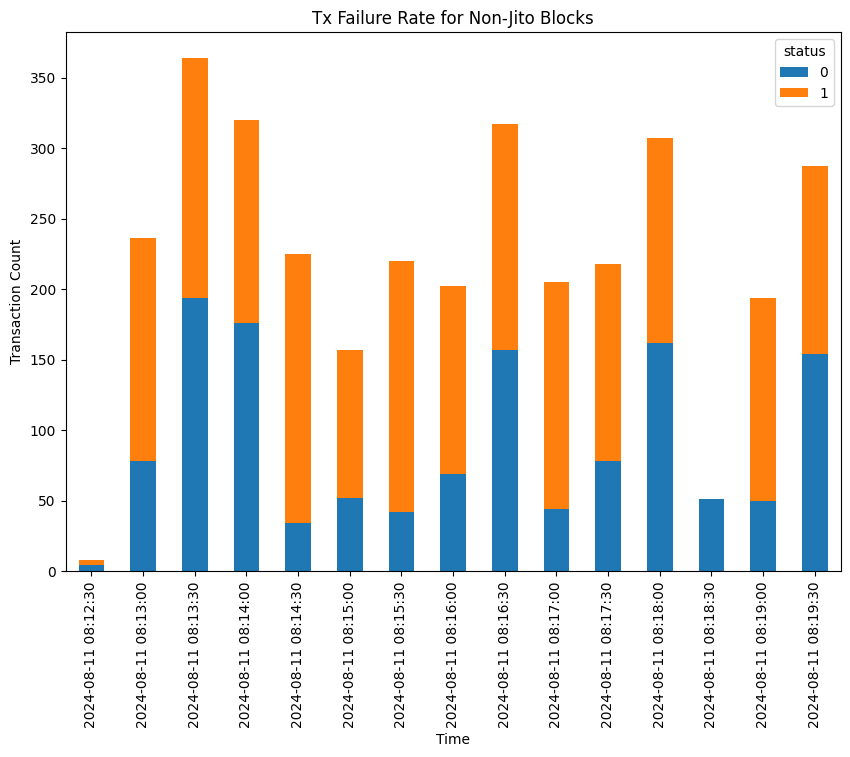

In [58]:
grouped_df = non_jito_block_df.groupby(['block_timestamp_rounded', 'status']).agg({'tx_count': 'sum'}).reset_index()

# Pivot the DataFrame for stacked bar chart
df_pivot = grouped_df.pivot(
    index='block_timestamp_rounded', columns='status', values='tx_count').fillna(0)

# Plot the stacked bar chart
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 7), title='Tx Failure Rate Spikes')

# Customize labels and title
plt.xlabel('Time')
plt.ylabel('Transaction Count')
plt.title('Tx Failure Rate for Non-Jito Blocks')

# Show the plot
plt.show()

In [ ]:
# Check failed and successful transactions in jito blocks and non jito blocks.
(
    df.with_columns(
        # add boolean column to indicate if the block is a jito block
        pl.col('block_slot').is_in(jito_block_label).alias('jito_block')
    )
    .group_by('block_slot', 'status').agg(
        pl.len().alias('tx_count'),
        pl.col('jito_block').first().alias('jito_block')
    )
    .sort(by='tx_count', descending=True)
    #
    .group_by('status', 'jito_block').agg(
        pl.len().alias('block_count'),
        pl.col('tx_count').sum().alias('tx_count')
    ).sort(by='jito_block')
    # .select('jito_block', 'tx_count', 'status').agg(
    #     pl.len().alias('tx_count')
    # )
)

status,jito_block,block_count,tx_count
str,bool,u32,u32
"""0""",false,256,1260
"""1""",false,396,1841
"""1""",true,40,248
"""0""",true,10,85


### Log Message Analysis

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering

# Sample data: assuming you have a Pandas DataFrame called df with a 'log_messages' column
log_messages = df.filter(pl.col('status') == "0").to_pandas()['log_messages'].explode().dropna().unique()

In [188]:
def analyze_log_clusters(df: pl.DataFrame, status: str) -> pl.DataFrame:
    """
    Analyze and cluster log messages based on their content for the given status.
    
    Parameters:
    - df (pl.DataFrame): The Polars DataFrame containing the log messages.
    - status (str): The status to filter log messages by ("0" or "1").
    
    Returns:
    - pl.DataFrame: A Polars DataFrame with clustered log messages and additional filtering information.
    """
    
    # Filter log messages based on the status parameter
    log_messages = df.filter(pl.col('status') == status).to_pandas()['log_messages'].explode().dropna().unique()
    
    # Convert list of log messages to a Pandas Series
    log_series = pd.Series(log_messages)
    
    # Vectorize the log messages using TF-IDF
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))
    tfidf_matrix = vectorizer.fit_transform(log_series)
    
    # Calculate cosine similarity between log messages
    cosine_sim = cosine_similarity(tfidf_matrix)
    
    # Cluster similar log messages using Agglomerative Clustering
    clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.3, metric='cosine', linkage='average')
    clusters = clustering.fit_predict(cosine_sim)
    
    # Add cluster labels to the original log messages
    log_series_with_clusters = pd.DataFrame({'log_message': log_series, 'cluster': clusters})
    
    # Convert back to Polars DataFrame
    log_clusters_df = pl.from_pandas(log_series_with_clusters)
    
    # Group by cluster and aggregate
    grouped_failed_log_clusters = log_clusters_df.group_by('cluster').agg(
        pl.len().alias('cluster_similarity_rank'), 
        pl.col('log_message').first()
    ).sort(by='cluster_similarity_rank', descending=True).drop('cluster')
    
    # Apply additional filtering
    filtered_df = grouped_failed_log_clusters.with_columns(
        pl.col("log_message").str.contains("compute units", literal=True).alias('contains_compute_units'),
        pl.col("log_message").str.contains("11111111111111111111111111111111", literal=True).alias('contains_11111111111111111111111111111111')
    )
    
    return (
        filtered_df
        .filter(pl.col('contains_compute_units') == False)
        .filter(pl.col('contains_11111111111111111111111111111111') == False)
        .drop('contains_compute_units', 'contains_11111111111111111111111111111111')
    )

In [189]:
fail_log_cluster = analyze_log_clusters(df, "0")
successful_log_cluster = analyze_log_clusters(df, "1")

In [190]:
fail_log_cluster.head(10)

cluster_similarity_rank,log_message
u32,str
7,"""Program HDwcJBJXjL9FpJ7UBsYBtaDjsBUhuLCUYoz3zr8SWWaQ failed: custom program error: 0xbbb"""
5,"""Program log: Instruction: WriteEncodedVaa"""
2,"""Program log: AnchorError caused by account: encoded_vaa. Error Code: WrongVaaOwner. Error Number: 6007. Error Message: The posted VAA account has the wrong owner.."""
1,"""Program pythWSnswVUd12oZpeFP8e9CVaEqJg25g1Vtc2biRsT invoke [1]"""
1,"""Program pythWSnswVUd12oZpeFP8e9CVaEqJg25g1Vtc2biRsT success"""
1,"""Program log: AnchorError thrown in programs/zeta/src/lib.rs:1206. Error Code: InvalidOracleUpdate. Error Number: 6169. Error Message: Invalid oracle update."""
1,"""Program log: AnchorError thrown in src/utils/vaa/zero_copy/encoded_vaa.rs:67. Error Code: UnverifiedVaa. Error Number: 10256. Error Message: UnverifiedVaa."""
1,"""Program log: AnchorError thrown in programs/core-bridge/src/state/encoded_vaa.rs:95. Error Code: AccountDidNotDeserialize. Error Number: 3003. Error Message: Failed to deserialize the account."""
1,"""Program rec5EKMGg6MxZYaMdyBfgwp4d5rB9T1VQH5pJv5LtFJ invoke [2]"""


In [191]:
successful_log_cluster.head(10)

cluster_similarity_rank,log_message
u32,str
75,"""Program log: Memo (len 6): ""4Fp0MT"""""
24,"""Program data: GmTE6l15n9+pRu1g/t7aw3a4vh7d7v4PFBVlHezOgLeJQSAX0X13hEEEoQFrcfro5UwGTpfWHwK4rubnJLz4rYF+V2hmZdr+AYkCYQAAAAAAAAAyBswNAAAAAIDbd1AOAAAA35oLDAAAAAAC"""
9,"""Program log: Instruction: CloseEncodedVaa"""
6,"""Program data: GmTE6l15n9+fjIBVW4UwM2+UV+gDbyl/4VtE/Hcpfj0+DtV0QEa8wFgATxZJ1HBf1Ie2xm86kQoqe/Bwofj9wPruswN5+tiFAYkCUQAAAAAAAAC7/csNAAAAAASOSkcOAAAAAgAAAAAAAAAC"""
1,"""Program rec5EKMGg6MxZYaMdyBfgwp4d5rB9T1VQH5pJv5LtFJ success"""
1,"""Program zDEXqXEG7gAyxb1Kg9mK5fPnUdENCGKzWrM21RMdWRq success"""
1,"""Program ComputeBudget111111111111111111111111111111 success"""
1,"""Program zDEXqXEG7gAyxb1Kg9mK5fPnUdENCGKzWrM21RMdWRq invoke [2]"""
1,"""Program log: Signed by Fc8bpeCMifWYv97pQ3k5xDvd98nuVg6yAaZrwmy4RRp6"""


In [194]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(text, title=None, excluded_words=None):
    if excluded_words is None:
        excluded_words = []
        
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=set(excluded_words)).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

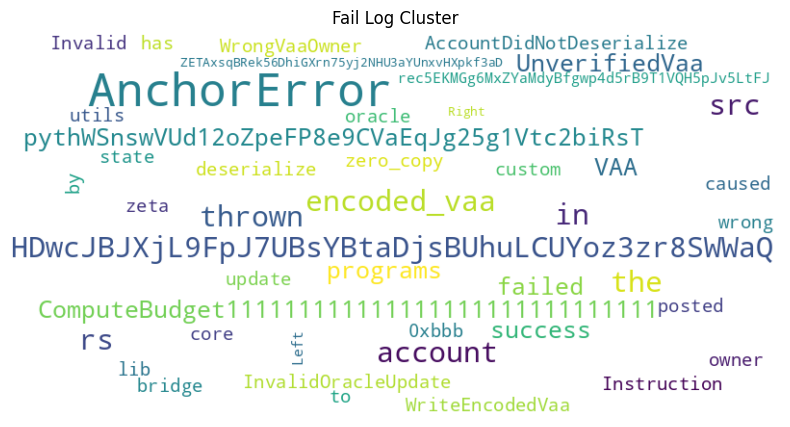

In [203]:
# Example: Visualize word cloud for a cluster
text = " ".join(fail_log_cluster['log_message'].explode().to_list())
plot_wordcloud(text, title="Fail Log Cluster", excluded_words=['error', 'program', 'log', 'Code', 'Message', 'Number','invoke'])

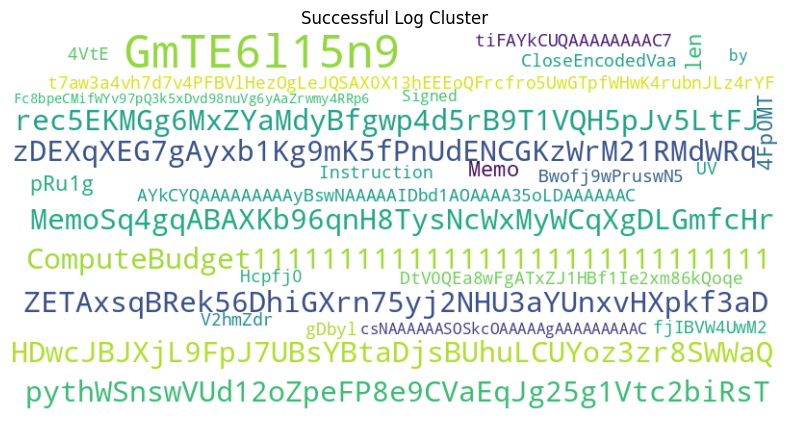

In [204]:
# Example: Visualize word cloud for a cluster
text = " ".join(successful_log_cluster['log_message'].explode().to_list())
plot_wordcloud(text, title="Successful Log Cluster", excluded_words=['invokte', 'success', 'data', 'log', 'Program', 'invoke'])